Random Forest - Regression

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
headers = ['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro', 'Hora_Retiro', 'Fecha Arribo', 'Hora_Arribo']
dtypes = ['str', 'int', 'int', 'int', 'object', 'object', 'int', 'object', 'object' ]

In [18]:
df_jan = pd.read_csv("2022-01.csv")

In [19]:
df_feb = pd.read_csv("2022-02.csv",dtype={"Genero_Usuario": "str", "Edad_Usuario": "int","Bici": int,"Ciclo_Estacion_Retiro": int})

C:\Users\sembe\AppData\Local\Temp\ipykernel_18836\3580688307.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_feb = pd.read_csv("2022-02.csv")


In [14]:
df_mar = pd.read_csv("2022-03.csv")

C:\Users\sembe\AppData\Local\Temp\ipykernel_18836\330665472.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mar = pd.read_csv("2022-03.csv")


In [15]:
df_apr = pd.read_csv("2022-04.csv")

In [16]:
df_may = pd.read_csv("2022-05.csv")

In [9]:
df_jan.shape

(393107, 9)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.drop(["datetime"], axis=1, inplace=True)

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


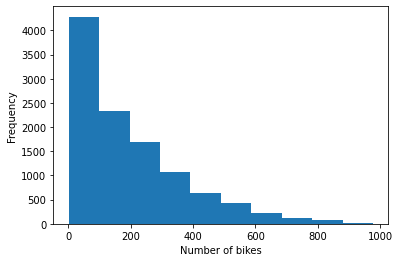

In [ ]:
plt.hist(df["count"])
plt.xlabel("Number of bikes")
plt.ylabel("Frequency")
plt.show()

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

In [ ]:
X_train.shape

(8164, 10)

In [ ]:
y_train.shape

(8164,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([512.08, 145.63, 274.69, ..., 377.9 , 445.09, 327.15])

In [ ]:
from sklearn import metrics
y_true = y_test # Your real values / test labels
 # The predictions from your ML / RF model

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_true, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_true, y_pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_true, y_pred))

Mean Absolute Error (MAE): 1.190587803085966
Mean Squared Error (MSE): 8.397345848640704
Root Mean Squared Error (RMSE): 2.8978174284520937
Mean Absolute Percentage Error (MAPE): 0.0060045543133140705
Explained Variance Score: 0.9997418747891371
Max Error: 46.549999999999955
Mean Squared Log Error: 0.00015227047037387373
Median Absolute Error: 0.45000000000000284
R^2: 0.9997394440799188
Mean Poisson Deviance: 0.02007553194841723
Mean Gamma Deviance: 0.00017480722485915576
